In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))
from mpmath import mp
#from mpmath import e

In [3]:
mp.dps = 1000  # set number of digits
my_pi = '3' + str(mp.pi)[2:]
my_pi = [elem for elem in my_pi]
my_e = '2' + str(mp.e)[2:]
my_e = [elem for elem in my_e]

[93, 116, 103, 103, 93, 97, 94, 95, 100, 106]


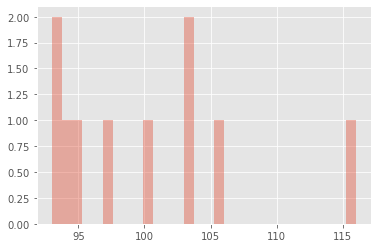

In [4]:
distribution = [0 for i in range(10)]
for elem in my_pi:
    distribution[int(elem)]+= 1
    
print(distribution)
sb.distplot(distribution, bins = 30, kde=False);

In [5]:
stat.chisquare(distribution, [100 for i in range(10)], ddof = 8).pvalue

0.028792120696197902

In [6]:
for i in range(10000):
    perm = np.random.permutation(my_pi)
    distribution = [0 for i in range(10)]
    for elem in my_pi:
        distribution[int(elem)] += 1

[100, 96, 98, 109, 99, 85, 99, 99, 103, 112]


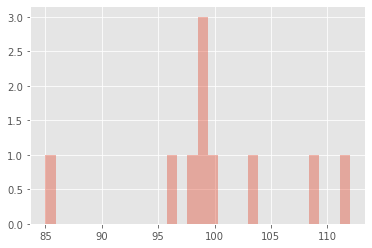

In [7]:
distribution = [0 for i in range(10)]
for elem in my_e:
    distribution[int(elem)]+= 1
    
print(distribution)
sb.distplot(distribution, bins = 30, kde=False);

In [8]:
stat.chisquare(distribution, [100 for i in range(10)], ddof = 8).pvalue

0.028131345277550394

In [9]:
stat.chisquare([100 for i in range(10)], [100 for i in range(10)], ddof = 8).pvalue

1.0

In [28]:
distribution_pi = [0 for i in range(10)]
for elem in my_pi:
    distribution_pi[int(elem)]+= 1
    
distribution_e = [0 for i in range(10)]
for elem in my_e:
    distribution_e[int(elem)]+= 1
print(stat.chisquare(distribution_pi, distribution_e, ddof = 0).pvalue)

print(stat.chi2_contingency([distribution_pi, distribution_e])[1])

0.5218252926713733
0.9219292441754194


In [27]:
distribution_pi = [0 for i in range(10)]
for elem in my_pi[:700]:
    distribution_pi[int(elem)]+= 1
    
distribution_e = [0 for i in range(10)]
for elem in my_e[:700]:
    distribution_e[int(elem)]+= 1
print(stat.chisquare(distribution_pi, distribution_e, ddof = 0).pvalue)

print(stat.chi2_contingency([distribution_pi, distribution_e])[1])

0.6755698554664746
0.9517053310727985


In [25]:
distribution_pi = [0 for i in range(10)]
for elem in my_pi[:400]:
    distribution_pi[int(elem)]+= 1
    
distribution_e = [0 for i in range(10)]
for elem in my_e[:400]:
    distribution_e[int(elem)]+= 1
print(stat.chisquare(distribution_pi, distribution_e, ddof = 0).pvalue)

print(stat.chi2_contingency([distribution_pi, distribution_e])[1])

0.002042643834653256
0.10692669718262399


## Permutations

In [30]:
samplesize = 10000
for length in [400, 700, 1000]:
    #calculating original chisq
    distribution_pi = [0 for i in range(10)]
    for elem in my_pi[:length]:
        distribution_pi[int(elem)] += 1
    distribution_e = [0 for i in range(10)]
    for elem in my_e[:length]:
        distribution_e[int(elem)] += 1
        
    T_0 = stat.chisquare(distribution_pi, distribution_e, ddof = 0).statistic
    print(T_0)
    
    #permutations
    counter = 0;
    for j in range(samplesize):
        tmp = my_pi[:length] + my_e[:length]
        tmp = np.random.permutation(tmp)
        new_pi = tmp[0:length]
        new_e = tmp[length:2*length]
        distribution_pi = [0 for i in range(10)]
        for elem in new_pi[:length]:
            distribution_pi[int(elem)] += 1
        distribution_e = [0 for i in range(10)]
        for elem in new_e[:length]:
            distribution_e[int(elem)] += 1
        
        #print(stat.chisquare(distribution_pi, distribution_e, ddof = 0).statistic)
        if (stat.chisquare(distribution_pi, distribution_e, ddof = 0).statistic > T_0+1):
            counter += 1
        #print(stat.chisquare(distribution_pi, distribution_e, ddof = 0).statistic)
        
        
    #print('\n\n\n\n')
    #getting p-value
    print('For length =', length, 'p-value is', (counter + 1) /(samplesize + 1))

26.000449353986895
For length = 400 p-value is 0.16778322167783222
6.630091383142556
For length = 700 p-value is 0.9195080491950804
8.122746573882665
For length = 1000 p-value is 0.8799120087991201


In [66]:
tmp = my_pi[:length] + my_e[:length]
np.random.permutation(tmp)

array(['4', '0', '3', ..., '4', '9', '9'], dtype='<U1')

# TASK 2

In [83]:
sample = stat.multivariate_normal([1, 2], \
                                  [[1, 0.5], [0.5, 1]]).rvs(100)
sample0 = [elem[0] for elem in sample]
sample1 = [elem[1] for elem in sample]

In [85]:
#p_wilcox = stat.wilcoxon(sample0, sample1)

In [86]:
iters = 100

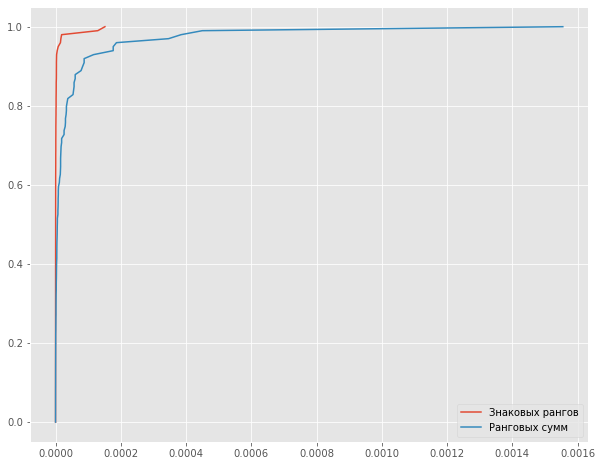

In [96]:
p_wilx = []; p_ranks = []
for i in range(iters):
    sample = stat.multivariate_normal([1, 2], \
                                  [[1, 0.5], [0.5, 1]]).rvs(50)
    sample0 = [elem[0] for elem in sample]
    sample1 = [elem[1] for elem in sample]
    
    p_wilx.append(stat.wilcoxon(sample0, sample1).pvalue); p_ranks.append(stat.ranksums(sample0, sample1).pvalue)
    
x_axes = np.linspace(0, 1, iters)

plt.figure(figsize = (10,8))
plt.plot(sorted(p_wilx), x_axes, label = 'Знаковых рангов')
plt.plot(sorted(p_ranks), x_axes, label = 'Ранговых сумм')
plt.legend()

plt.show()

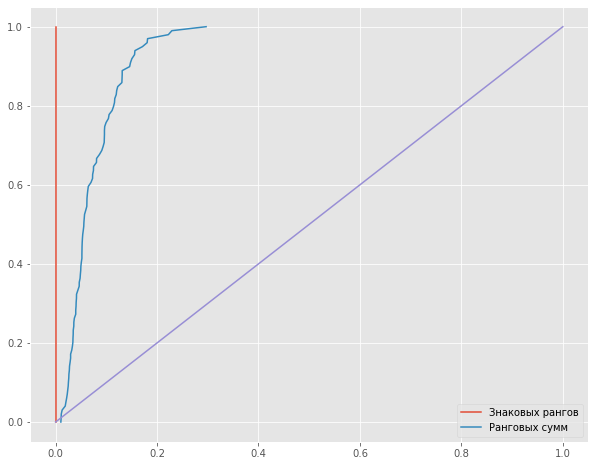

In [101]:
p_wilx = []; p_ranks = []
for i in range(iters):
    sample0 = stat.cauchy.rvs(size = 100)
    sample1 = [elem + stat.bernoulli(0.5).rvs() for elem in sample0]
    
    p_wilx.append(stat.wilcoxon(sample0, sample1).pvalue); p_ranks.append(stat.ranksums(sample0, sample1).pvalue)
    
x_axes = np.linspace(0, 1, iters)

plt.figure(figsize = (10,8))
plt.plot(sorted(p_wilx), x_axes, label = 'Знаковых рангов')
plt.plot(sorted(p_ranks), x_axes, label = 'Ранговых сумм')
plt.plot(x_axes, x_axes)
plt.legend()

plt.show()